# Homework #2 (due 10th of November, 11:59 PM):


### Part 1)
- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data. You can select two features for x and y axes at a time and color the samples according to their classes. You are not expected to try all pairs, which would be too many. But please show a few examples. 
- Also use box plots to look at the data. Please show that you are able to examine some features (not all them are necessary).
- Create a training and test set (with shuffling).
- Train a **decision tree classifier** using the training set.
- What are the top 5 most important (discriminative) features?
- Train a **logistic regression model** using the training set.
- Which model (DT or LR) performed better on the test set? Note: You can use score() method of built-in classifiers to compare.


Importing necesarry libraries

In [1225]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree as tr
import random
from cv2 import rotate
from matplotlib.pyplot import xlabel, xlim, xticks


## Creation of the database

In [1226]:
data = datasets.load_breast_cancer() #load the breast cancer dataset
cancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

## Plotting some of the features

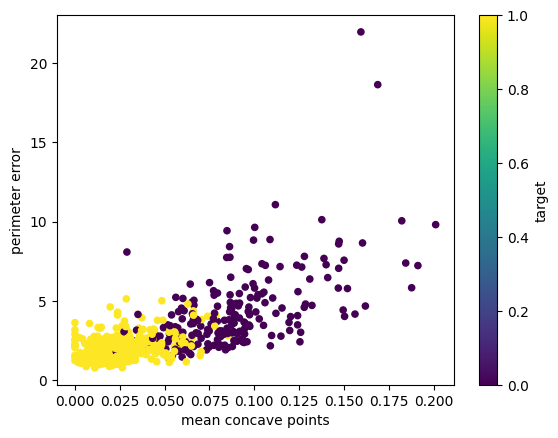

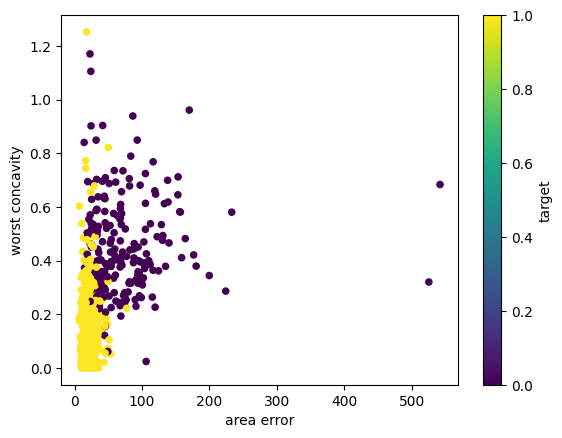

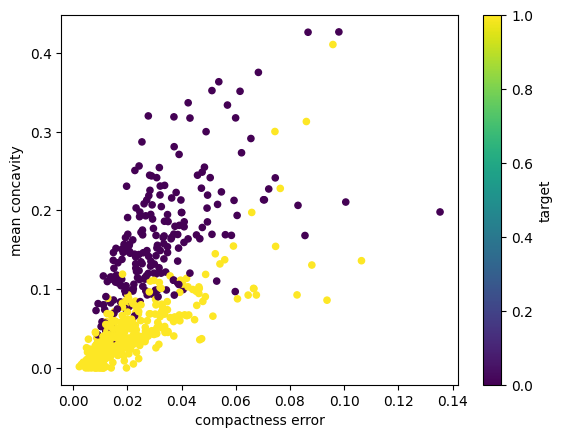

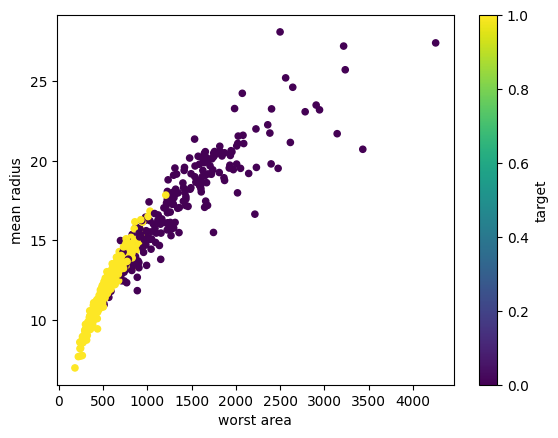

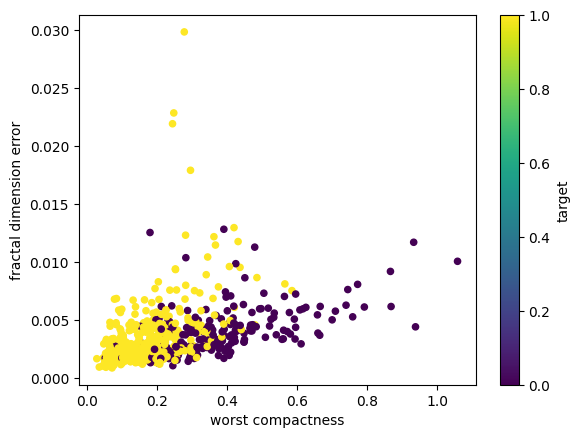

In [1227]:
#use scatter plots to look at the data
for i in range(5):
    x_n, y_n = random.sample(list(data.feature_names), 2)
    cancer_df.plot.scatter(x=x_n,y=y_n,s=20,c='target',colormap='viridis')

## Creating Box Plots

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'mean compactness'),
  Text(2, 0, 'mean concavity'),
  Text(3, 0, 'mean concave points'),
  Text(4, 0, 'mean symmetry'),
  Text(5, 0, 'mean fractal dimension'),
  Text(6, 0, 'compactness error'),
  Text(7, 0, 'concavity error'),
  Text(8, 0, 'symmetry error'),
  Text(9, 0, 'worst smoothness'),
  Text(10, 0, 'worst compactness'),
  Text(11, 0, 'worst concave points'),
  Text(12, 0, 'worst symmetry'),
  Text(13, 0, 'worst fractal dimension')])

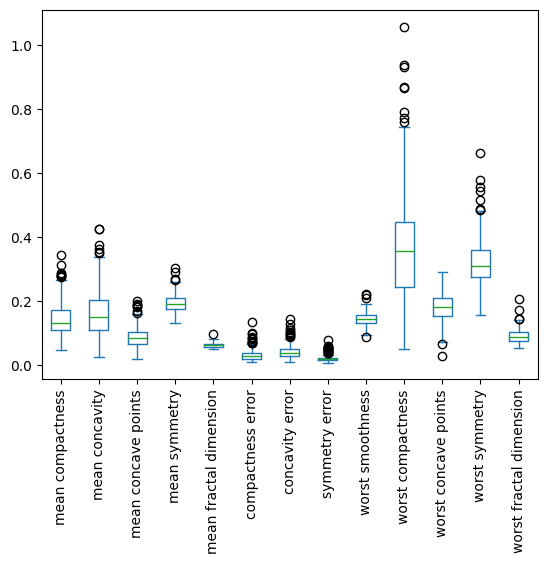

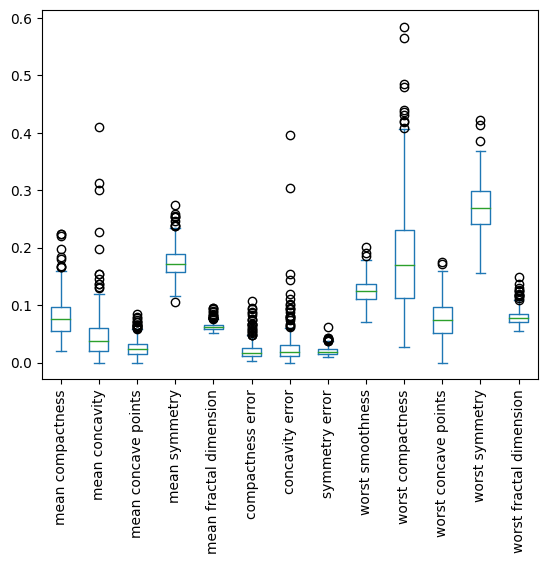

In [1228]:
#use boxplot to look at the data
box_df = cancer_df.drop(['mean area', 'area error', 'worst area', 'mean perimeter', 'worst perimeter', 'mean radius', 'worst radius', 'mean texture', 'worst texture', 'texture error', 'perimeter error', 'radius error', 'mean smoothness', 'smoothness error', 'fractal dimension error', 'concave points error', "worst concavity"], axis=1)
#I eleminated one by one the big ones that does not differ a lot
box_df[box_df['target']==0].drop('target', axis=1).plot.box()
xticks(rotation=90)
box_df[box_df['target']==1].drop('target', axis=1).plot.box()  
xticks(rotation=90)

### I also impelemented a version of boxplot which is deciding values to plot according to the most important features but i decided to use the first one

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'worst smoothness'),
  Text(2, 0, 'concavity error'),
  Text(3, 0, 'worst texture'),
  Text(4, 0, 'worst radius'),
  Text(5, 0, 'worst concave points')])

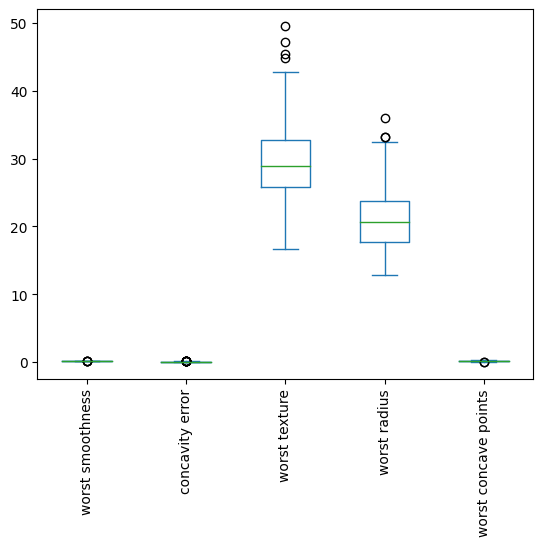

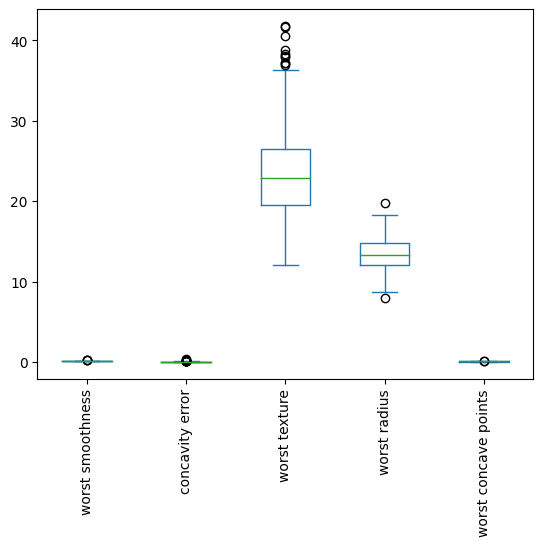

In [1243]:
train_df, test_df = train_test_split(cancer_df)  #creating train and test set
tree = DecisionTreeClassifier(max_depth=10) #decision tree classifier
tree.fit(train_df.drop('target', axis=1), train_df['target'])
most_features = data.feature_names[sorted(range(len(tree.feature_importances_)), key=lambda x: tree.feature_importances_[x])[-5:]]
most_features = list(most_features)
most_features.append("target")
box_df = cancer_df[most_features]
box_df[box_df['target']==0].drop('target', axis=1).plot.box()
xticks(rotation=90)
box_df[box_df['target']==1].drop('target', axis=1).plot.box()  
xticks(rotation=90)

## Creating the Tree

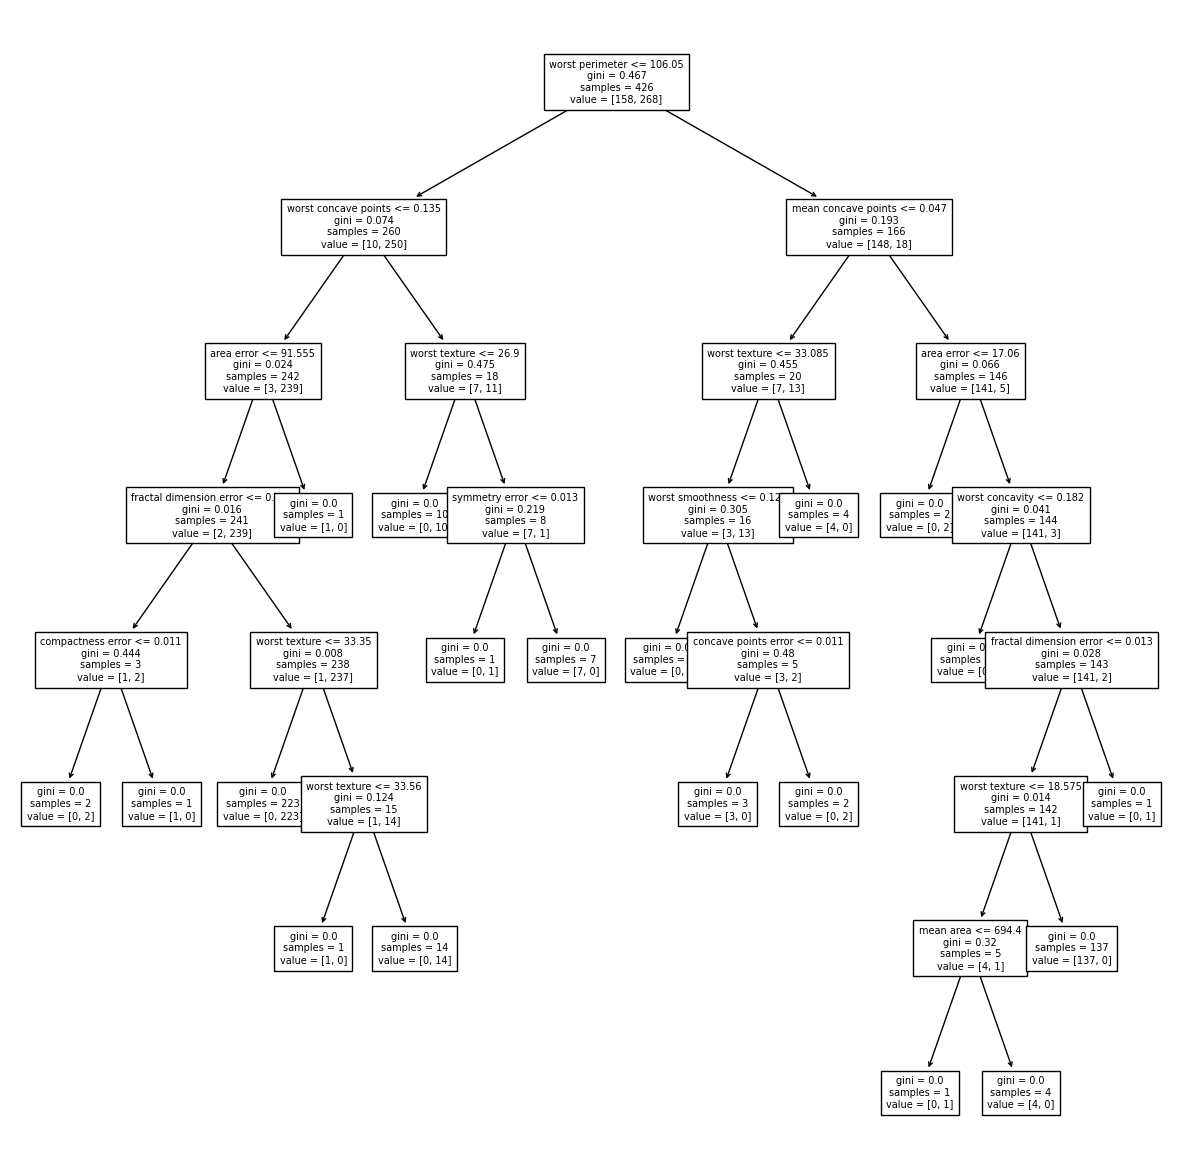

In [1230]:
train_df, test_df = train_test_split(cancer_df)  #creating train and test set
tree = DecisionTreeClassifier(max_depth=10) #decision tree classifier
tree.fit(train_df.drop('target', axis=1), train_df['target'])
pyplot.figure(figsize=(15,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=7)
pyplot.show()

In [1231]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.00804837, 0.        ,
       0.        , 0.        , 0.06709747, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0288803 , 0.        ,
       0.00670697, 0.        , 0.01207255, 0.0088029 , 0.01307867,
       0.        , 0.06744565, 0.74181268, 0.        , 0.01244982,
       0.        , 0.00971309, 0.02389154, 0.        , 0.        ])

In [1232]:
most_features = data.feature_names[sorted(range(len(tree.feature_importances_)), key=lambda x: tree.feature_importances_[x])[-5:]]
print(f'5 the most important features are "{most_features[0]}", "{most_features[1]}", "{most_features[2]}", "{most_features[3]}" and "{most_features[4]}"')

5 the most important features are "worst concave points", "area error", "mean concave points", "worst texture" and "worst perimeter"


## Plotting the scores to be able to observe best C value for Logistic Regression

/Users/harunerenmutlu/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/harunerenmutlu/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

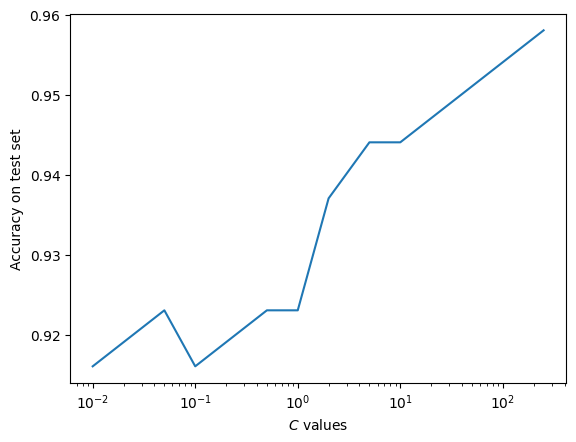

In [1233]:
#to find optimal c value for logistic regression
cvals = [0.01, 0.05, 0.1, 0.5, 1.0, 2, 5, 10, 50, 250]
results = np.zeros(10)
index=0
for cv in cvals:
    lr = LogisticRegression(penalty='l2', C=cv, fit_intercept=True, solver='lbfgs', max_iter=1000, multi_class='auto')
    lr.fit(train_df.drop(['target'], axis=1),train_df['target'])
    accuracy = lr.score(test_df.drop('target', axis=1), test_df['target'])
    results[index]= accuracy
    index+=1
cmax = cvals[sorted(range(len(results)), key=lambda x: results[x])[-1]]
pyplot.plot(cvals, results)
pyplot.xscale('log')
pyplot.xlabel('$C$ values')
pyplot.ylabel('Accuracy on test set')
pyplot.show()

## Comparing the results of Decision Tree Classifier and Logistic Regression

In [1234]:
lr_orig = LogisticRegression(C=cmax, max_iter=1000)
lr_orig.fit(train_df.drop(['target'], axis=1),train_df['target'])
score_lr = lr_orig.score(test_df.drop(['target'], axis=1),test_df['target'])
score_tree = tree.score(test_df.drop(['target'], axis=1),test_df['target'])

/Users/harunerenmutlu/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1235]:
print(f'The score of logistic regression is {score_lr} and the score of decision tree is {score_tree}, {"Decision Tree" if score_tree>score_lr else "Logistic Regression"} is more efficient in the test set')

The score of logistic regression is 0.958041958041958 and the score of decision tree is 0.9090909090909091, Logistic Regression is more efficient in the test set


### Part 2)

- Get *winequality_white.csv* which uploaded with the Homework file.

- Last column (quality) is the target variable.

- Train a decision tree regressor using the training set. Try different 'min_samples_split' and 'max_depth' parameters. Which ones worked best on the test set? What is the MSE on the test set with the best parameters.

In [1236]:
wine_df = pd.read_csv("winequality_white.csv", sep=';')

In [1237]:
train_wine_df, test_wine_df = train_test_split(wine_df) 

### Plotting the scores to be able to observe best Max Depth and Minimum Number of Samples values for Logistic Regression

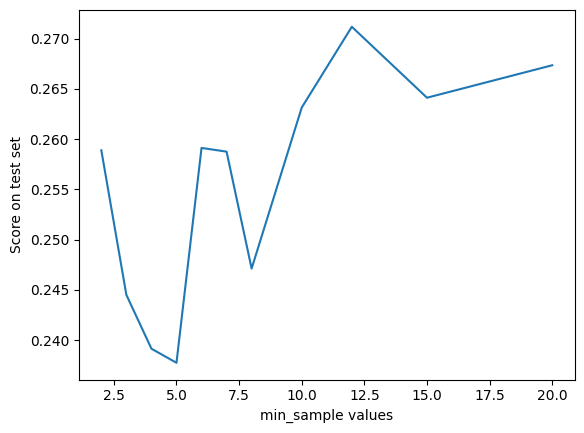

In [1238]:
msample = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]
errors = np.zeros(11)
index=0
for d in msample:
    tree_reg = DecisionTreeRegressor(max_depth=8, min_samples_split=d)
    tree_reg.fit(train_wine_df.drop('quality',axis=1),train_wine_df['quality'])
    u=tree_reg.score(test_wine_df.drop('quality',axis=1), test_wine_df['quality'])
    errors[index]=u
    index+=1
optimal_min_sample = msample[sorted(range(len(errors)), key=lambda x: errors[x])[-1]]
pyplot.plot(msample, errors)
pyplot.xlabel('min_sample values')
pyplot.ylabel('Score on test set')
pyplot.show()

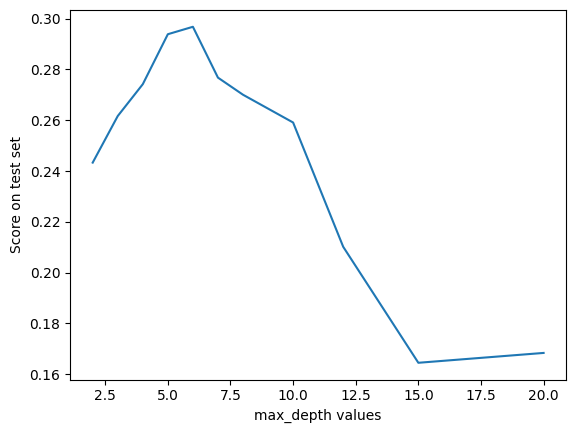

In [1239]:
mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]
errors = np.zeros(11)
index=0

for d in mdepths:
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=optimal_min_sample)
    tree_reg.fit(train_wine_df.drop('quality',axis=1),train_wine_df['quality'])
    u=tree_reg.score(test_wine_df.drop('quality',axis=1), test_wine_df['quality'])
    errors[index]=u
    index+=1
optimal_max_depth = mdepths[sorted(range(len(errors)), key=lambda x: errors[x])[-1]]
pyplot.plot(mdepths, errors)
pyplot.xlabel('max_depth values')
pyplot.ylabel('Score on test set')
pyplot.show()

In [1240]:
print(f'Optimal max depth is {optimal_max_depth}, and optimal min samples is {optimal_min_sample}')
tree_reg = DecisionTreeRegressor(max_depth=optimal_max_depth, min_samples_split=optimal_min_sample)
tree_reg.fit(train_wine_df.drop('quality',axis=1),train_wine_df['quality'])

Optimal max depth is 6, and optimal min samples is 12


DecisionTreeRegressor(max_depth=6, min_samples_split=12)

In [1241]:
print(f"The score is {tree_reg.score(test_wine_df.drop('quality',axis=1), test_wine_df['quality'])}")

The score is 0.2968256752638758


In [1242]:
print(f"The MSE is: {mean_squared_error(test_wine_df['quality'], tree_reg.predict(test_wine_df.drop('quality',axis=1))):.4f}")

The MSE is: 0.5061
